<a href="https://colab.research.google.com/github/Shridhar2602/RecSys/blob/main/Pre_Mid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import math

### Read Data and tweaks

In [ ]:
DF = pd.read_excel('/content/gdrive/MyDrive/RS/Course Recommendation System(1-128).xlsx')
DF.drop(DF.iloc[:, 0:6], axis=1, inplace=True) # Delete unnecessary columns
# DF.drop_duplicates(keep=False, inplace=True) # Remove duplicate rows
len(DF)

128

In [ ]:
DF.head()

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.80,0.9,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,0.8,NaN
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.40,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
DF.dropna(inplace=True)

len(DF)
# DF.head()

52

In [ ]:
# scaled_df = StandardScaler().fit_transform(DF)

100.5422794117647


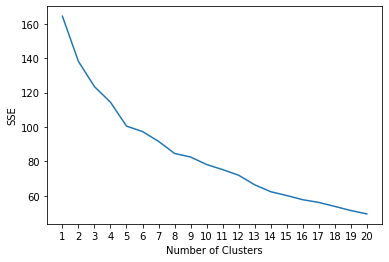

In [ ]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(DF)
    if(k == 5):
      print(kmeans.inertia_)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

[0 0 4 4 0 1 4 1 2 0 3 4 0 4 2 1 2 1 2 4 1 4 2 2 3 4 2 0 2 2 0 2 1 3 0 1 4
 0 4 3 1 2 1 3 1 1 0 2 4 1 2 4]


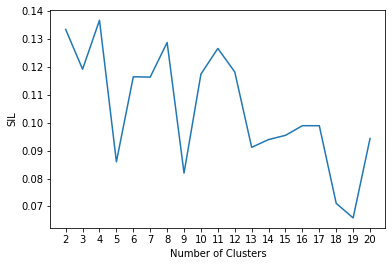

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(DF)
  labels = kmeans.labels_
  if(k == 5):
    print(kmeans.labels_)
  sil.append(silhouette_score(DF, labels, metric = 'euclidean'))

plt.plot(range(2, 21), sil)
plt.xticks(range(2, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SIL")
plt.show()

Optimal k feels like 5 since there is  a elbow in SSE and Silhoutee score has a peak

In [ ]:
# from sklearn.decomposition import TruncatedSVD

data = pd.read_excel('/content/gdrive/MyDrive/RS/Course Recommendation System(1-162).xlsx')

data = data.fillna(0.5)

X = data.drop(data.iloc[:, 0:6], axis=1) # Delete unnecessary columns

class TruncatedSVD:
    def __init__(self, n_components):
        self.n_components = n_components
    
    def my_fit_transform(self, A):
        m, n = A.shape

        ATA = np.dot(A.T, A)
        AAT = np.dot(A, A.T)

        eigenvalues, eigenvectors = self.my_eig(ATA)

        sort_index = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, sort_index]
        eigenvalues = eigenvalues[sort_index]

        self.U = np.dot(A, eigenvectors)

        self.S = np.sqrt(eigenvalues[:self.n_components])

        self.Vt = eigenvectors.T[:self.n_components, :]

        return np.dot(np.dot(self.U[:, :self.n_components], np.diag(self.S)), self.Vt)

    def my_transform(self, A):
        return np.dot(np.dot(A, self.Vt.T), np.diag(self.S ** -1))[:, :self.n_components]

    def my_eig(self, A, num_iterations = 10):
      n = A.shape[0]
      Q = np.identity(n)
      for i in range(num_iterations):
          # Q, R = np.linalg.qr(A.dot(Q))
          Q, R = self.my_gram_Schmidt(A.dot(Q))
          A = R.dot(Q)
      eigenvalues = np.diag(A)
      eigenvectors = Q
      return eigenvalues, eigenvectors

    def my_gram_Schmidt(self,A):
      m, n = A.shape
      Q = np.zeros((m, n))
      R = np.zeros((n, n))

      for j in range(n):
          v = A[:, j]
          for i in range(j):
              R[i, j] = Q[:, i].dot(A[:, j])
              v = v - R[i, j] * Q[:, i]
          R[j, j] = np.linalg.norm(v)
          Q[:, j] = v / R[j, j]

      return Q, R

X = X.to_numpy()
# print(X.shape)
# print(X.head())
# print(X)
svd = TruncatedSVD(10)
X = svd.my_fit_transform(X)
# print(X.shape)
# print(X)

kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
A = kmeans.labels_

print(A)


[2 3 3 3 3 3 4 0 4 3 3 2 4 3 3 3 3 2 3 3 4 4 2 3 4 4 1 3 3 0 4 3 0 2 3 4 4
 3 4 4 3 2 3 4 3 4 4 0 1 2 4 4 4 4 4 4 0 3 2 0 3 2 4 0 0 3 4 0 4 4 2 2 3 4
 4 0 3 4 4 4 3 3 4 4 0 4 1 4 1 0 4 2 4 3 3 4 4 4 3 2 4 4 3 3 0 4 2 0 1 4 4
 1 3 4 1 1 3 1 3 4 0 4 4 4 4 0 4 1 4 4 4 4 4 4 0 4 3 4 4 4 4 4 0 0 4 0 0 4
 4 3 3 4 2 3 0 4 3 1 0 2 3 2]


In [ ]:
# Create a KMeans instance with k=3 clusters
kmeans = my_KMeans(k=5)

# Fit the model to the data
kmeans.fit(DF)

# Predict the cluster labels for the data points
labels = kmeans.predict(DF)

In [ ]:
print(labels)

(128, 10)

[1 3 1 3 4 1 2 3 1 1 1 1 1 1 1 1 2 1 3 1 3 1 3 0 1 1 3 2 2 4 3 0 2 0 3 2 1
 1 4 1 3 0 0 1 3 1 1 3 0 3 3 1 2 1 1 4 2 3 1 1 0 3 1 3 2 3 3 3 2 1 3 3 3 1
 0 2 3 1 3 1 3 3 4 1 2 1 3 1 3 4 2 2 1 3 2 0 1 1 3 3 4 2 0 1 4 2 2 0 2 3 1
 2 3 3 0 1 1 1 2 2 4 1 1 2 1 2 1 3]

[3 2 1 0 2 0 1 2 0 0 2 0 2 2 0 2 2 0 0 0 2 0 0 0 2 0 0 1 2 3 3 0 2 4 3 1 2
 0 3 0 0 4 2 2 0 0 0 1 3 0 2 1 1 0 2 3 2 0 0 0 2 2 0 0 1 3 2 2 1 1 0 2 0 2
 3 1 0 2 2 0 3 2 3 1 1 0 4 0 4 3 1 2 2 2 2 2 2 2 2 3 4 0 2 0 0 0 2 3 1 3 1
 1 0 2 4 0 0 2 1 2 2 4 0 1 0 1 1 3]

In [ ]:
# self.adj = defaultdict(list)classification

[1 1 4 2 1 4 4 4 4 3 1 2 3 3 3 0 0 0 0 0 2 2 2 2 2]
(25, 10)